In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pd.set_option('display.max_columns', 100)

repertory = 'motorcycle_skateboard_sounds'
df = pd.read_csv(f"data/{repertory}/son.csv")
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,target
0,-0.006133,0.007522,-0.530282,1.237212,0.305129,3.761381,1.376360,3.754882,7.805931,1.142206,3.455689,7.503913,0.756558,2.828392,6.526417,0.076647,-0.056618,0.004803,0.001152,0.000091,31.653257,0.162555,194.722792,218.375705,242.089149,0.986699,3.026670,13.567207,11.989067,184.395585,0.058508,0.268031,1.356898,0.017072,0.081534,0.506893,0.008551,0.040891,0.256790,0.979066,0.987955,0.994091,0.008998,0.006349,0.004553,71686.934103,261.140357,274.514958,0.453772,1.098394,620.047327,1.592912,2.907108,60.830527,5158.656718,0.003046,0.028700,2.200720,0.000563,0.006692,1.926567,0.000281,0.003347,1.449727,-0.092770,0.997356,0.998240,0.999075,0.000059,0.000050,0.000023,motorcycle
1,-0.005560,0.005475,-0.359994,1.375210,-0.118200,3.043629,1.610620,4.079501,8.133749,1.364592,3.843455,7.897519,0.872278,3.290411,7.261575,0.223835,-0.207916,0.016698,0.005510,0.000571,31.906938,0.225660,141.393865,435.690495,581.066139,0.974207,3.029778,11.975693,9.947749,139.037683,0.062471,0.312129,2.115565,0.019303,0.098328,1.000566,0.009677,0.049329,0.517127,0.974540,0.983882,0.993315,0.008499,0.009234,0.006966,99515.432447,262.204914,379.533057,0.474757,1.157824,628.253954,1.580940,2.835437,78.018307,8800.829287,0.001843,0.016066,1.759809,0.000327,0.003508,1.484640,0.000164,0.001755,1.036442,-0.222409,0.998277,0.999283,0.999574,0.000068,0.000041,0.000023,motorcycle
2,-0.010262,0.009260,-0.995837,2.069758,-0.018424,6.444875,0.847291,3.114615,7.147000,0.509361,2.617562,6.630495,0.271191,1.851369,5.686687,0.117050,-0.127159,0.007995,0.001329,0.000231,20.759458,0.249118,83.331844,620.942017,1045.105556,0.968473,3.702523,14.871692,7.133691,65.443855,0.130750,0.523992,2.625069,0.045812,0.179050,1.437039,0.023030,0.090012,0.796643,0.951859,0.969011,0.984163,0.014068,0.011646,0.010612,109860.858419,242.620768,452.808964,0.334263,0.892585,639.924513,1.738510,3.436092,94.738778,12352.371375,0.001242,0.010969,1.544797,0.000209,0.002212,1.230277,0.000105,0.001106,0.786270,-0.181872,0.999070,0.999383,0.999628,0.000086,0.000023,0.000032,motorcycle
3,-0.007824,0.007561,-0.500459,1.232568,-0.000720,3.624417,1.184758,3.599646,7.650160,0.859658,3.324537,7.374010,0.483546,2.753438,6.743041,0.190811,-0.211918,0.021288,0.002939,0.000218,39.652271,0.280511,141.357496,850.150099,1056.012757,0.959851,1.451305,3.384831,10.804640,224.899467,0.024160,0.402694,2.260544,0.006218,0.154707,1.022597,0.003111,0.078180,0.523367,0.966512,0.987683,0.997846,0.022730,0.012844,0.002376,123704.949299,276.164448,447.939443,0.472857,1.126125,632.007446,1.580818,2.864183,99.965002,15547.248271,0.001520,0.013302,1.543565,0.000275,0.002997,1.240114,0.000137,0.001499,0.820860,-0.267964,0.998018,0.999673,0.999787,0.000168,0.000050,0.000023,motorcycle
4,-0.011471,0.009096,-0.577695,1.604678,0.006649,5.985762,0.958900,3.094062,7.132289,0.703710,2.665357,6.694230,0.411826,1.865164,5.769744,0.101494,-0.110668,0.002880,0.000617,0.000091,71.748296,0.162857,440.560363,173.921617,363.827416,0.986650,2.705387,12.587494,22.001734,796.454601,0.011375,0.134178,0.896343,0.002631,0.042060,0.292979,0.001316,0.021110,0.147119,0.993070,0.997569,0.999088,0.004317,0.001569,0.000816,71819.846580,274.513997,261.625445,0.410276,1.011191,614.278721,1.657644,3.137999,49.426726,4137.641178,0.004406,0.040541,2.286110,0.000903,0.0

In [2]:
print( df.isna().sum().sort_values(ascending=False))

feature0     0
feature1     0
feature52    0
feature51    0
feature50    0
            ..
feature23    0
feature22    0
feature21    0
feature20    0
target       0
Length: 72, dtype: int64


In [3]:
# df = pd.get_dummies(df, columns=['target'])
# target_corr = df.corrwith(df["target_car"])
# target_corr.sort_values()

In [4]:
tmp = df.shape[1]
df.dropna(axis='columns', inplace=True)
print("{} colonnes ont été supprimés car les valeurs étaient aberrantes".format(tmp - df.shape[1]))

0 colonnes ont été supprimés car les valeurs étaient aberrantes


In [5]:
y = df["target"]
X = df.select_dtypes(include=['int', 'float'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
print("Il y a {} données pour notre set de training.\nIl y a {} données pour notre set de test".format(len(X_train), len(X_test)))

unique, counts = np.unique(y_train, return_counts=True)
counts
target1 = unique[0]
target2 = unique[1]

Il y a 40 données pour notre set de training.
Il y a 11 données pour notre set de test


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
def launch_model(model):
    model.fit(X_train, y_train)

    #Prédictions avec le set de test
    predictions = model.predict(X_test)
    print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))
    
    #Calculer la précision
    sc = model.score(X_test, y_test)
    print("En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))
    
    # Plot the confusion matrix
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Matrice de confusion:\n{disp.confusion_matrix}")

<h2>Test du model SVC</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['motorcycle' 'skateboard' 'skateboard' 'motorcycle' 'motorcycle'
 'motorcycle' 'skateboard' 'skateboard' 'motorcycle' 'skateboard'
 'skateboard']
En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.45454545454545453.
Matrice de confusion:
[[2 3]
 [3 3]]


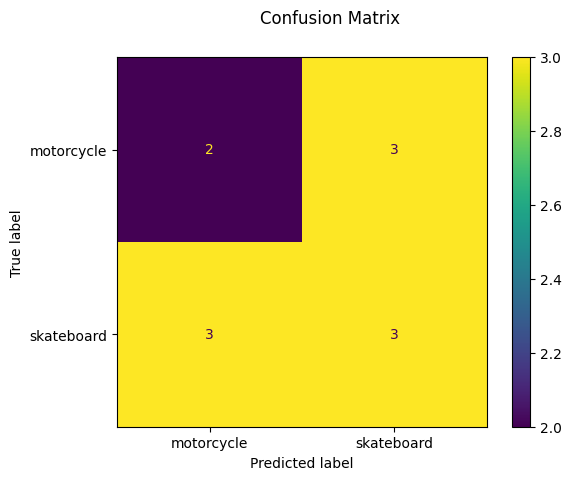

In [9]:
#Entrainement avec le set de training
launch_model(SVC())

<h2> Test d'un modèle Random Forest </h2>

Comme prédictions, nous obtenons les résultats suivants : 
['motorcycle' 'skateboard' 'skateboard' 'motorcycle' 'motorcycle'
 'motorcycle' 'skateboard' 'skateboard' 'motorcycle' 'skateboard'
 'skateboard']
En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.45454545454545453.
Matrice de confusion:
[[2 3]
 [3 3]]


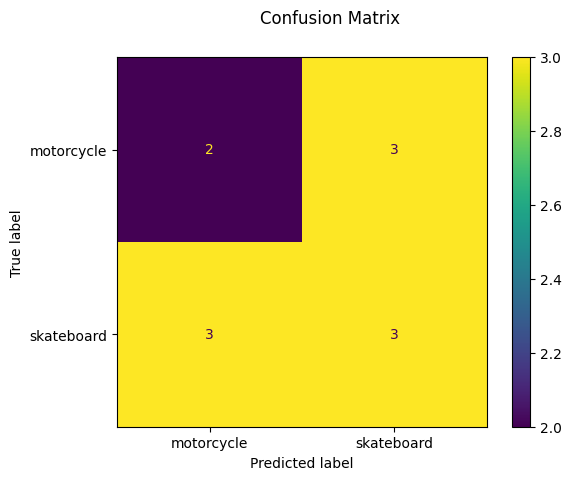

In [10]:
from sklearn.ensemble import RandomForestClassifier

launch_model(RandomForestClassifier(n_estimators=100))

<h2>Test du modele Gaussian Naive Bayes</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['motorcycle' 'motorcycle' 'skateboard' 'motorcycle' 'motorcycle'
 'motorcycle' 'motorcycle' 'skateboard' 'motorcycle' 'motorcycle'
 'skateboard']
En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.5454545454545454.
Matrice de confusion:
[[4 1]
 [4 2]]


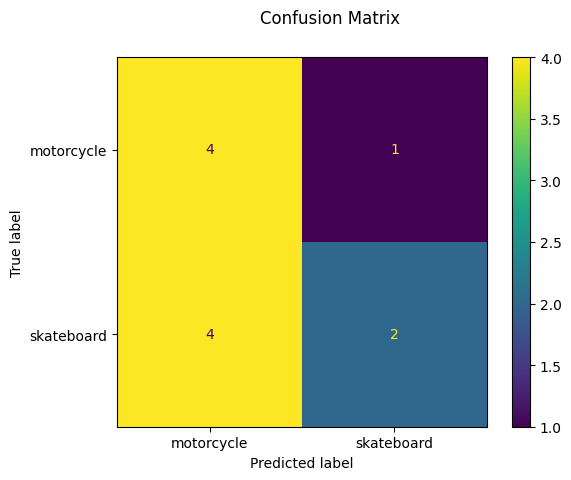

In [11]:
from sklearn.naive_bayes import GaussianNB

launch_model(GaussianNB())

<h2>Test du modèle Régression Logistique</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['motorcycle' 'motorcycle' 'skateboard' 'motorcycle' 'motorcycle'
 'motorcycle' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard']
En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.6363636363636364.
Matrice de confusion:
[[3 2]
 [2 4]]


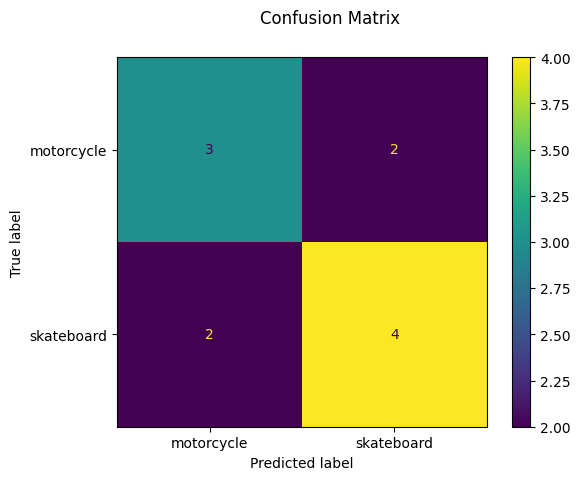

In [12]:
from sklearn.linear_model import LogisticRegression

launch_model(LogisticRegression())


<h2>Test d'un réseau de neurones</h2>

In [13]:
from keras.utils import to_categorical
y_train.replace(to_replace=target1,
           value=0, inplace=True)
y_train.replace(to_replace=target2,
           value=1, inplace=True)
y_test.replace(to_replace=target1,
           value=0, inplace=True)
y_test.replace(to_replace=target2,
           value=1, inplace=True)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


def initialize_model():   
    # Define the model
    model = Sequential([
        # First layer with 5 neurons, relu activation and input shape
        Dense(5, activation='relu', input_dim = X_train.shape[1]),
        # Output layer for 2-class classification
        Dense(1, activation='sigmoid')
    ])
    return model

model = initialize_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10,# how many epochs to wait before stopping
    restore_best_weights=True,    
    )

model.fit(
    X_train, y_train,
    batch_size=2,
    epochs=100,
    validation_split=0.3,
    callbacks=[early_stopping]    
)


Epoch 1/100


C:\Users\utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


14/14 [==============================] - 1s 16ms/step - loss: 0.7048 - accuracy: 0.6071 - val_loss: 0.6396 - val_accuracy: 0.5833
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6071 - val_loss: 0.6409 - val_accuracy: 0.5833
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.6071 - val_loss: 0.6425 - val_accuracy: 0.5833
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6137 - accuracy: 0.6786 - val_loss: 0.6429 - val_accuracy: 0.5833
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5802 - accuracy: 0.6429 - val_loss: 0.6488 - val_accuracy: 0.5833
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.6786 - val_loss: 0.6504 - val_accuracy: 0.5833
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.6786 - val_loss: 0.6531 - val_accuracy: 0.6667
Epoch 8/100
14/14 [=====